# Basic
## 1.MNIST手寫數字資料庫(Fully connected)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2.7.0


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#view data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(set(y_train))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


5


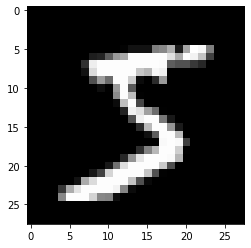

In [4]:
#view data(pic)
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# 像素0~255標準化
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [7]:
# Get the model.
ANN = keras.Sequential(name='ClassificationANN')
# input從28*28轉為784
ANN.add(layers.Flatten(input_shape=(28,28)))
# hidden layer神經元數量可調整
ANN.add(layers.Dense(128,activation='relu'))
ANN.add(layers.Dense(64,activation='relu'))
# output必須為0~9
ANN.add(layers.Dense(10,activation='softmax'))

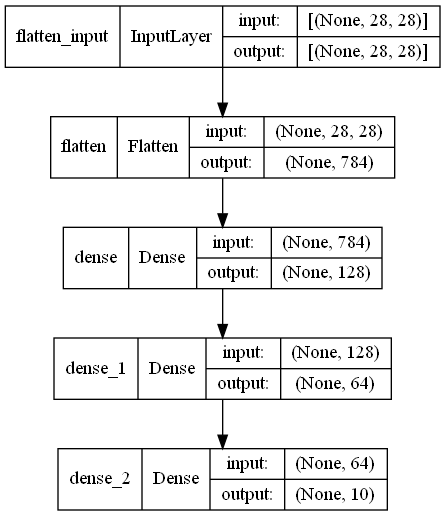

In [8]:
keras.utils.plot_model(ANN,show_shapes=True)

In [9]:
#非onehotencoding時使用sparse_categorical_crossentropy
ANN.compile(optimizer='Adam',
            loss=keras.losses.sparse_categorical_crossentropy)

In [10]:
ANN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2450
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1030
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0705
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0541
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0433


In [12]:
predicts = ANN.predict(x_test)
predict_label = np.argmax(predicts,axis=1)

預測手寫數字為: 1
正確手寫數字為: 1.0


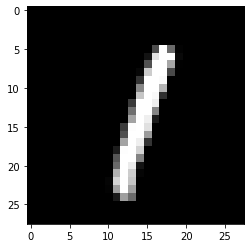

In [13]:
print('預測手寫數字為:',predict_label[5])
print('正確手寫數字為:',y_test[5])
plt.imshow(x_test[5],cmap='gray')

In [14]:
print('正確率為:',np.mean(predict_label==y_test))

正確率為: 0.9721


一般NN建置快速,但未考慮圖片特性
在複雜的圖片如相片上,可能無法正確處理

## 2.MNIST手寫數字資料庫(CNN)

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#view data
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(set(y_train))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [16]:
# 像素0~255標準化
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [17]:
#僅有灰階 RGB中僅有1層
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [18]:
CNN = keras.Sequential(name='CNN')
# hidden layer神經元數量可調整 convolution size可調整 max poll size可調整
CNN.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
CNN.add(layers.MaxPool2D((2,2)))
CNN.add(layers.Conv2D(64,(3,3),activation='relu'))
CNN.add(layers.MaxPool2D((2,2)))
# 提取完影像特徵 回到ANN
CNN.add(layers.Flatten())
CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dense(64,activation='relu'))
CNN.add(layers.Dense(10,activation='softmax'))

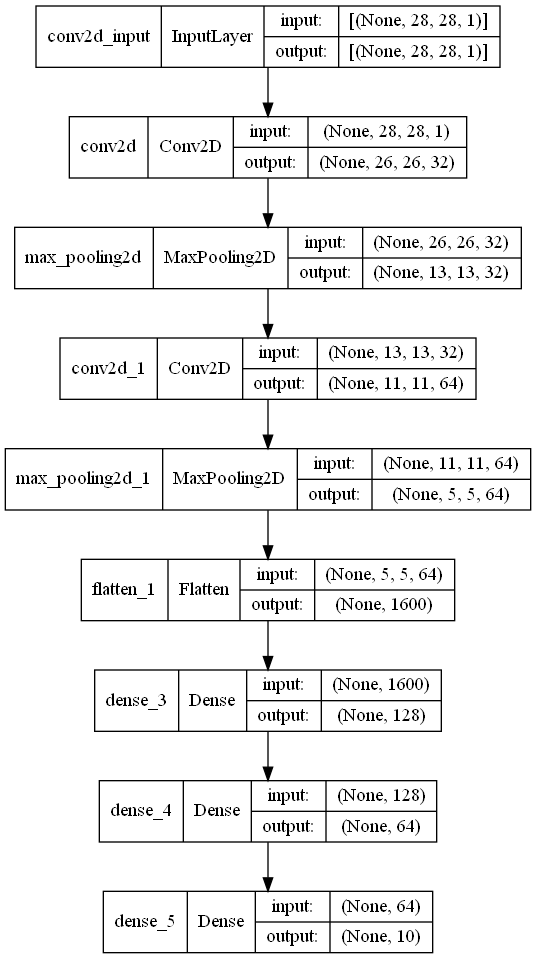

In [19]:
keras.utils.plot_model(CNN,show_shapes=True)

In [20]:
CNN.compile(optimizer='Adam',
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [21]:
CNN.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1366 - accuracy: 0.9593
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0442 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0181 - accuracy: 0.9944


In [22]:
predicts = CNN.predict(x_test)
predict_label = np.argmax(predicts,axis=1)

In [23]:
print('正確率為:',np.mean(predict_label==y_test))

正確率為: 0.9891


卷積網路提取出圖片特徵,可以掌握圖片特定pattern
雖在簡單圖片上和一般NN表現差不多,但在複雜圖片上因為考量圖片特性可以有更好的表現

## 3.embedding語句分類(RNN)
#### waimai_10k
#### Sourse: https://github.com/InsaneLife/ChineseNLPCorpus

In [24]:
NP = pd.read_csv('https://raw.githubusercontent.com/SophonPlus/ChineseNlpCorpus/master/datasets/waimai_10k/waimai_10k.csv')

In [25]:
NP.head()

,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！


In [26]:
pattern = re.compile('.{1}')
word_data = [pattern.findall(s) for s in NP.review]

In [27]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(word_data)
print(len(tokenizer.index_word))

2537


In [28]:
text_tensor = tokenizer.texts_to_sequences(word_data)

In [29]:
#需根據文本內容調整參數
text_tensor = tf.keras.preprocessing.sequence.pad_sequences(
    text_tensor,
    padding = 'post',
    truncating = 'post',
    maxlen = 30
)

In [30]:
#embedding dimension可自訂
numwords = len(tokenizer.index_word)
embedding_dim = 250

In [32]:
#非字補0也為input,需+1
RNN_C = tf.keras.Sequential()
RNN_C.add(layers.Embedding(numwords+1,embedding_dim))
RNN_C.add(layers.SimpleRNN(64,kernel_regularizer=keras.regularizers.l2(0.1)))
RNN_C.add(layers.Dropout(0.2))
RNN_C.add(layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.1)))
RNN_C.add(layers.Dense(2,activation='softmax'))

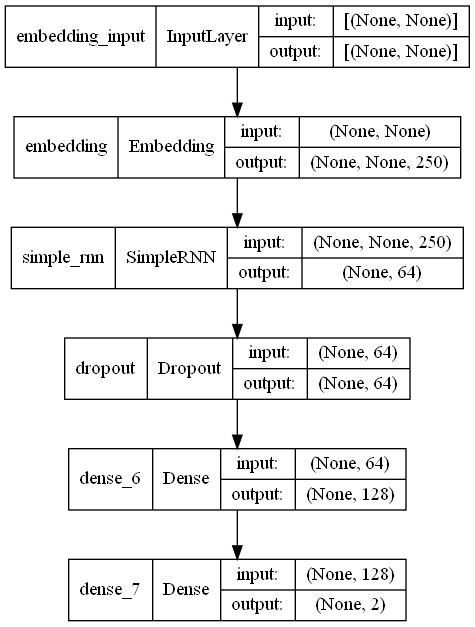

In [33]:
keras.utils.plot_model(RNN_C,show_shapes=True)

In [34]:
#改以SGD取代Adam嘗試效果
sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
RNN_C.compile(optimizer=sgd,
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]) 

In [35]:
RNN_C.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 250)         634500    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                20160     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 663,238
Trainable params: 663,238
Non-trainable params: 0
_________________________________________________________________


In [36]:
x_train,x_test = text_tensor[:int(len(text_tensor)*0.9)],text_tensor[int(len(text_tensor)*0.9):]
y_train,y_test = np.array(NP.label[:int(len(text_tensor)*0.9)]),np.array(NP.label[int(len(text_tensor)*0.9):])

In [37]:
history = RNN_C.fit(x_train,y_train,validation_split=0.2,epochs=30,batch_size=128,verbose=1)

Epoch 1/30
68/68 [==============================] - 3s 23ms/step - loss: 17.6408 - sparse_categorical_accuracy: 0.5406 - val_loss: 15.4068 - val_sparse_categorical_accuracy: 0.5931
Epoch 2/30
68/68 [==============================] - 1s 20ms/step - loss: 13.5874 - sparse_categorical_accuracy: 0.6161 - val_loss: 11.8068 - val_sparse_categorical_accuracy: 0.5783
Epoch 3/30
68/68 [==============================] - 1s 19ms/step - loss: 10.4414 - sparse_categorical_accuracy: 0.6351 - val_loss: 8.9902 - val_sparse_categorical_accuracy: 0.7841
Epoch 4/30
68/68 [==============================] - 1s 20ms/step - loss: 8.0120 - sparse_categorical_accuracy: 0.7169 - val_loss: 7.1311 - val_sparse_categorical_accuracy: 0.5700
Epoch 5/30
68/68 [==============================] - 1s 22ms/step - loss: 6.1578 - sparse_categorical_accuracy: 0.7658 - val_loss: 5.5478 - val_sparse_categorical_accuracy: 0.6335
Epoch 6/30
68/68 [==============================] - 1s 21ms/step - loss: 4.8142 - sparse_categorical

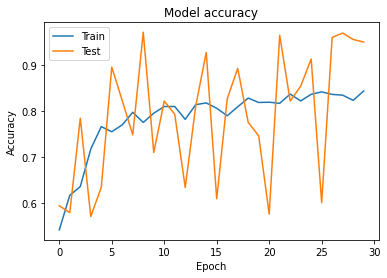

In [38]:
# 繪製訓練&驗證準確率
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

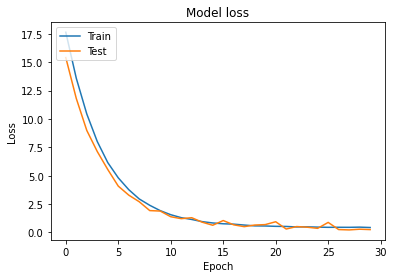

In [39]:
# 繪製訓練&驗證損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
predicts = RNN_C.predict(x_test)
predict_label = np.argmax(predicts,axis=1)

In [41]:
print('正確率為:',np.mean(predict_label==y_test))

正確率為: 0.9582985821517932


In [42]:
x_test_words = np.array(NP.review[int(len(text_tensor)*0.8):])
print('評價文字為:',x_test_words[8])
print('預測評價為:',predict_label[8])
print('正確評價為:',predict_label[8])

評價文字為: 排骨也就六七块，牛肉羹看不见牛肉，搞活动可以吃吃，因为便宜，不搞活动还是算了吧！还不如吃个盖饭
預測評價為: 0
正確評價為: 0


語意需考量前後文,RNN遞迴特性可一定程度對應到此特性  
此情況training情形正常,但validation出現問題,可能為overfitting  
可嘗試Regularization,Dropout,減少模型深度,增加資料量,batch size調整  
但loss正常反應,Accuracy震盪,最大的問題或許來自模型架構的設計 或是 原始資料的處理  
如何進行更好的字詞切割及前處理在語意分析上的重要性很高  
前處理沒有使model正確學到語句字詞之間的關聯

## 4.設定GPU工作環境

In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]